In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage
import random

In [2]:
def fibonacci_recursion(n):

    if n <= 1:
        return n
    else:
        return fibonacci_recursion(n-1) + fibonacci_recursion(n-2)

print(f"The 14th Fibonacci number is: {fibonacci_recursion(14)}")

The 14th Fibonacci number is: 377


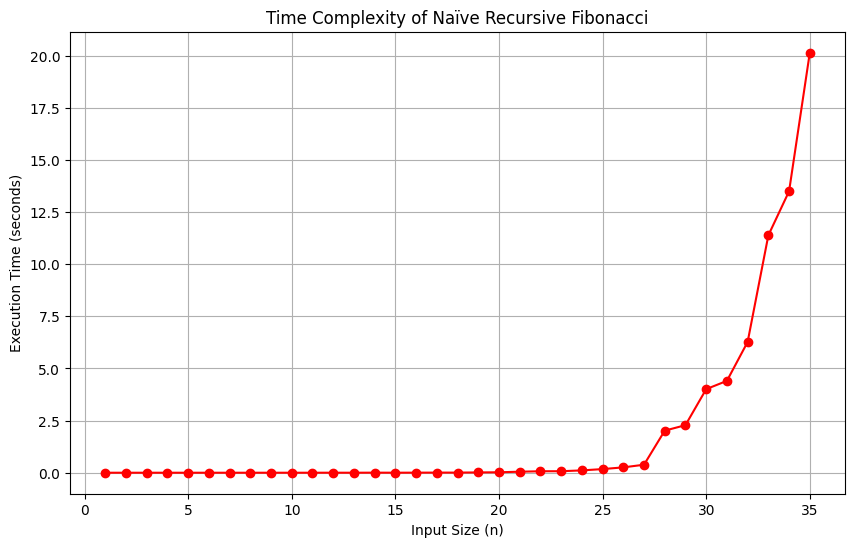

In [3]:
# Defining range of input size upto 36 to display Execution Time against n
n_values = np.arange(1, 36)
times = []

# Measuring execution time for each n
for n in n_values:
    start_time = time.time()
    fibonacci_recursion(n)
    end_time = time.time()
    times.append(end_time - start_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, marker='o', linestyle='-', color='r')
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Time Complexity of Naïve Recursive Fibonacci")
plt.grid(True)
plt.show()

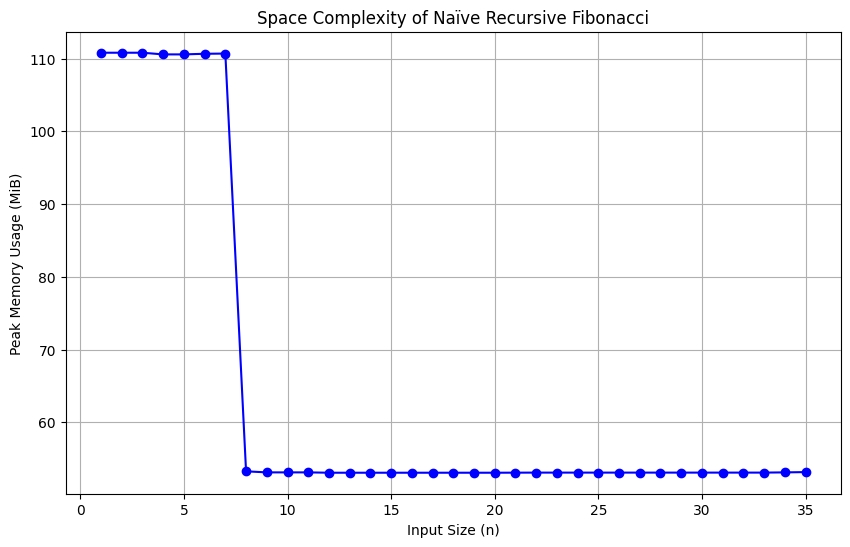

In [4]:
n_values = np.arange(1, 36)
memory_usages = []

# Measure peak memory usage for each n
for n in n_values:
    # Returns a list of memory samples; we take the max as the peak usage.
    usage = memory_usage((fibonacci_recursion, (n,)), interval=0.01)
    memory_usages.append(max(usage))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, memory_usages, marker='o', linestyle='-', color='b')
plt.xlabel("Input Size (n)")
plt.ylabel("Peak Memory Usage (MiB)")
plt.title("Space Complexity of Naïve Recursive Fibonacci")
plt.grid(True)
plt.show()

In [7]:
# A cache to store computed Fibonacci values
fib_dict = {}

def fibonacci_dp(n):

    if n in fib_dict:
        return fib_dict[n]
    
    if n <= 1:
        result = n
    else:
        result = fibonacci_dp(n-1) + fibonacci_dp(n-2)
    
    fib_dict[n] = result
    return result

fib_dict = {}
print(f"The 14th Fibonacci number is: {fibonacci_dp(14)}")

# Can handle much larger numbers efficiently
fib_dict = {}
print(f"The 100th Fibonacci number is: {fibonacci_dp(100)}")

The 14th Fibonacci number is: 377
The 100th Fibonacci number is: 354224848179261915075


In [ ]:
# Time Complexity Plotting
# Using a larger value of n
n_values = np.arange(1, 501)
times = []

for n in n_values:

    fib_dict = {}
    start_time = time.time()
    fibonacci_dp(n)
    end_time = time.time()
    times.append(end_time - start_time)

# --- Plotting the Time Complexity ---
plt.figure(figsize=(10, 6))
plt.plot(n_values, times, marker='.', linestyle='-', color='g')
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Time Complexity of Dynamic Programming Fibonacci")
plt.grid(True)
plt.show()

In [ ]:
# Space Complexity Plotting
n_values = np.arange(1, 501)
memory_usages = []

# This wrapper function ensures the cache is reset for each profiling run
def profile_fib_dp(n):
    global fib_dict
    fib_dict = {} # Reset cache for this specific run
    return fibonacci_dp(n)

for n in n_values:
    # memory_usage runs the function in a separate process
    usage = memory_usage((profile_fib_dp, (n,)), interval=0.01)
    memory_usages.append(max(usage))

# --- Plotting the Space Complexity ---
plt.figure(figsize=(10, 6))
plt.plot(n_values, memory_usages, marker='.', linestyle='-', color='m')
plt.xlabel("Input Size (n)")
plt.ylabel("Peak Memory Usage (MiB)")
plt.title("Space Complexity of Dynamic Programming Fibonacci")
plt.grid(True)
plt.show()

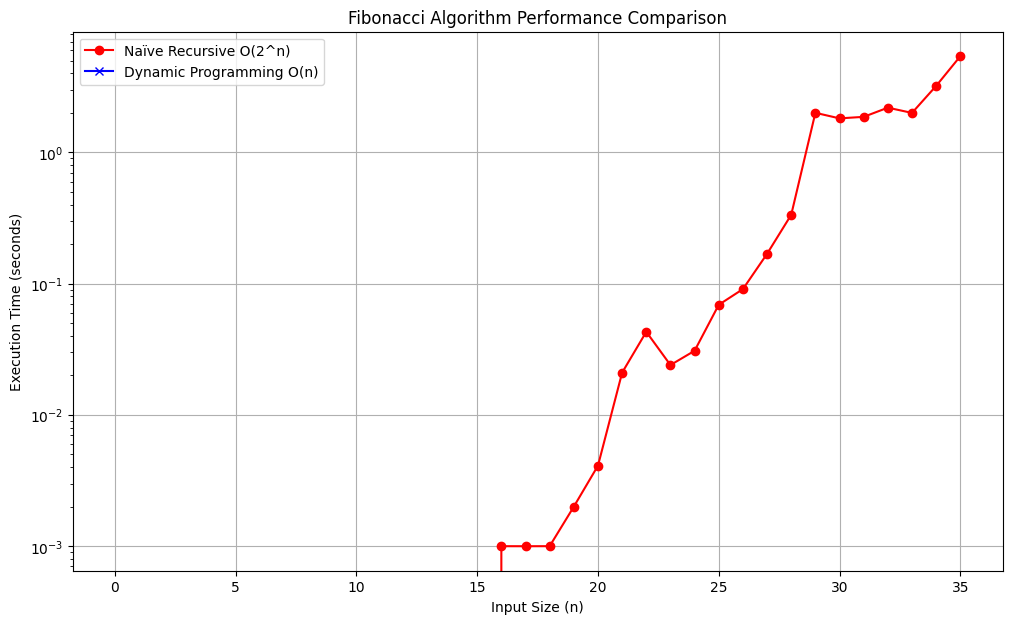

In [8]:
# --- Performance Measurement ---
# Fibonacci using Recursion vs Fibonacci using DP

recursive_n_values = range(36)
dp_n_values = range(36) # Using same range for a direct comparison on the plot

# Lists to store execution times
recursive_times = []
dp_times = []

# Measure time for the naive recursive version
for n in recursive_n_values:
    start_time = time.time()
    fibonacci_recursion(n)
    end_time = time.time()
    recursive_times.append(end_time - start_time)

# Measure time for the dynamic programming version
for n in dp_n_values:
    fib_dict = {} # Clear cache for each independent run
    start_time = time.time()
    fibonacci_dp(n)
    end_time = time.time()
    dp_times.append(end_time - start_time)
    
# --- Plotting the Results ---
plt.figure(figsize=(12, 7))
plt.plot(recursive_n_values, recursive_times, label='Naïve Recursive O(2^n)', color='red', marker='o')
plt.plot(dp_n_values, dp_times, label='Dynamic Programming O(n)', color='blue', marker='x')

plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Fibonacci Algorithm Performance Comparison')
plt.legend()
plt.grid(True)
# Using a logarithmic scale for the y-axis to better visualize the massive difference
plt.yscale('log')
plt.show()

In [ ]:
def binary_search(arr, x):
    
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (high + low) // 2
        
        # If x is greater, ignore left half
        if arr[mid] < x:
            low = mid + 1
        # If x is smaller, ignore right half
        elif arr[mid] > x:
            high = mid - 1
        # means x is present at mid
        else:
            return mid
            
    # If we reach here, then the element was not present
    return -1

# --- Test ---
sorted_array = [2, 3, 4, 10, 40, 55, 67, 80]
target = 10

result = binary_search(sorted_array, target)

if result != -1:
    print(f"Element is present at index {result}")
else:
    print("Element is not present in array")

In [ ]:
# --- Space Complexity Profiling ---
# Use very large input sizes to demonstrate constant space usage
input_sizes = [10000, 100000, 1000000, 10000000, 50000000]
memory_usages = []

# This loop measures the peak memory for each input size [cite: 60]
for size in input_sizes:
    # Create a large sorted array
    sorted_array = np.arange(size)
    # Target is -1, a value not in the array
    target = -1
    
    # Run the function through memory_profiler and get the peak memory
    usage = memory_usage((binary_search, (sorted_array, target)))
    memory_usages.append(max(usage))

# --- Plotting the Space Complexity ---
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, memory_usages, marker='o', linestyle='-', color='b')
plt.xlabel("Input Size (n)")
plt.ylabel("Peak Memory Usage (MiB)")
plt.title("Space Complexity of Iterative Binary Search")
plt.grid(True)
# Using a non-logarithmic y-axis to clearly show the flat line
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

In [ ]:
def bubble_sort(arr):

    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break

In [ ]:
def run_single_test_and_plot(algo, name, input_sizes):

    time_results = []
    memory_results = []

    for size in input_sizes:
        data = [random.randint(0, 1000000) for _ in range(size)]
        
        # --- Time Measurement ---
        start_time = time.time()
        algo(data)
        end_time = time.time()
        duration = end_time - start_time
        time_results.append(duration)
        
        # --- Memory Measurement using memory_profiler ---
    
        usage = memory_usage((algo, (data,)), interval=0.01)
        
        mem_used = max(usage) - min(usage)
        memory_results.append(mem_used)

    
    # Plotting Time Complexity
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, time_results, marker='o', linestyle='-', label=f'{name} Time')
    plt.title(f'Time Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plotting Space Complexity
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, memory_results, marker='o', linestyle='-', label=f'{name} Memory', color='orange')
    plt.title(f'Space Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Memory Increase (MiB)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    input_sizes = [1000, 2500, 5000, 7500, 10000]
    run_single_test_and_plot(bubble_sort, 'Bubble Sort', input_sizes)

In [ ]:
def selection_sort(arr):

    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

In [ ]:
def run_single_test_and_plot(algo, name, input_sizes):

    time_results = []
    memory_results = []

    for size in input_sizes:
        data = [random.randint(0, 1000000) for _ in range(size)]
        
        # --- Time Measurement ---
        start_time = time.time()
        algo(data)
        end_time = time.time()
        duration = end_time - start_time
        time_results.append(duration)
        
        # --- Memory Measurement
        usage = memory_usage((algo, (data,)), interval=0.01)
        
        mem_used = max(usage) - min(usage)
        memory_results.append(mem_used)

    # Plotting Time Complexity [cite: 61]
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, time_results, marker='o', linestyle='-', label=f'{name} Time')
    plt.title(f'Time Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plotting Space Complexity [cite: 61]
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, memory_results, marker='o', linestyle='-', label=f'{name} Memory', color='orange')
    plt.title(f'Space Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Memory Increase (MiB)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    input_sizes = [1000, 2500, 5000, 7500, 10000]
    run_single_test_and_plot(selection_sort, 'Selection Sort', input_sizes)

In [ ]:

def insertion_sort(arr):

    for i in range(1, len(arr)):
       
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [ ]:

def run_single_test_and_plot(algo, name, input_sizes):

    time_results = []
    memory_results = []

    for size in input_sizes:
        # Generate random data for sorting
        data = [random.randint(0, 1000000) for _ in range(size)]
        
        # --- Time Measurement ---
        start_time = time.time()
        algo(data)
        end_time = time.time()
        duration = end_time - start_time
        time_results.append(duration)
        
        # Memory Measurement
        usage = memory_usage((algo, (data,)), interval=0.01)
        
        mem_used = max(usage) - min(usage)
        memory_results.append(mem_used)

    
    # Plotting Time Complexity
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, time_results, marker='o', linestyle='-', label=f'{name} Time')
    plt.title(f'Time Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plotting Space Complexity
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, memory_results, marker='o', linestyle='-', label=f'{name} Memory', color='orange')
    plt.title(f'Space Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Memory Increase (MiB)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    input_sizes = [1000, 2500, 5000, 7500, 10000]
    run_single_test_and_plot(insertion_sort, 'Insertion Sort', input_sizes)

In [ ]:
def merge_sort(arr):

    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        
        merge_sort(L)
        merge_sort(R)
        
        i = j = k = 0
        
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
            
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
            
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1


In [ ]:
def run_single_test_and_plot(algo, name, input_sizes):
    time_results = []
    memory_results = []

    for size in input_sizes:
        data = [random.randint(0, 1000000) for _ in range(size)]
        
        # --- Time Measurement --- 
        start_time = time.time()
        algo(data)
        end_time = time.time()
        duration = end_time - start_time
        time_results.append(duration)
        
        # --- Memory Measurement 
        usage = memory_usage((algo, (data,)), interval=0.01)
      
        mem_used = max(usage) - min(usage)
        memory_results.append(mem_used)

    
    # Plotting Time Complexity
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, time_results, marker='o', linestyle='-', label=f'{name} Time')
    plt.title(f'Time Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plotting Space Complexity
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, memory_results, marker='o', linestyle='-', label=f'{name} Memory', color='orange')
    plt.title(f'Space Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Memory Increase (MiB)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    input_sizes = [1000, 2500, 5000, 7500, 10000]
    run_single_test_and_plot(merge_sort, 'Merge Sort', input_sizes)

In [ ]:
def quick_sort(arr):
    
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)


In [ ]:
def run_single_test_and_plot(algo, name, input_sizes):
 
    time_results = []
    memory_results = []

    for size in input_sizes:
        data = [random.randint(0, 1000000) for _ in range(size)]
        
        # --- Time Measurement ---
        start_time = time.time()
        # Your quick_sort returns a new list, so we capture the result
        sorted_data = algo(data)
        end_time = time.time()
        duration = end_time - start_time
        time_results.append(duration)
        
        #  Memory Measurement
        usage = memory_usage((algo, (data,)), interval=0.01)
        
        mem_used = max(usage) - min(usage)
        memory_results.append(mem_used)
    
    # Plotting Time Complexity
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, time_results, marker='o', linestyle='-', label=f'{name} Time')
    plt.title(f'Time Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plotting Space Complexity
    plt.figure(figsize=(10, 6))
    plt.plot(input_sizes, memory_results, marker='o', linestyle='-', label=f'{name} Memory', color='orange')
    plt.title(f'Space Complexity: {name}', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Memory Increase (MiB)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("Plots generated. \n")

if __name__ == "__main__":
    input_sizes = [1000, 2500, 5000, 7500, 10000]
    run_single_test_and_plot(quick_sort, 'Quick Sort', input_sizes)

In [ ]:
def run_tests(algorithms, input_sizes):

    results = {name: [] for name in algorithms.keys()}

    for size in input_sizes:
        for name, algo in algorithms.items():
       
            if name == 'Binary Search':
                data = list(range(size)) # Create a simple sorted list
                target = -1 # Search for an element not in the list (worst case)
                
                start_time = time.process_time()
                algo(data, target) # Call with list and target
                end_time = time.process_time()
            else:
                data = [random.randint(0, 1000000) for _ in range(size)]
                
                start_time = time.process_time()
                if name == 'Quick Sort':
                    _ = algo(data)
                else:
                    algo(data)
                end_time = time.process_time()
            
            duration = end_time - start_time
            results[name].append(duration)

    return results

def plot_results(results, input_sizes):

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 8))

    for name, times in results.items():
        plt.plot(input_sizes, times, marker='o', linestyle='-', label=name)

    plt.title('Execution Time vs. Input Size for All Algorithms', fontsize=16)
    plt.xlabel('Input Size (Number of elements)', fontsize=12)
    plt.ylabel('Execution Time (seconds)', fontsize=12)
    plt.legend(title='Algorithm', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # algorithms to test
    algorithms = {
        'Merge Sort': merge_sort,
        'Quick Sort': quick_sort,
        'Insertion Sort': insertion_sort,
        'Bubble Sort': bubble_sort,
        'Selection Sort': selection_sort,
        'Binary Search': binary_search 
    }

    input_sizes = [1000, 2500, 5000, 7500, 10000]

    performance_results = run_tests(algorithms, input_sizes)
    
    # Plot the results
    plot_results(performance_results, input_sizes)